In [25]:
#importing libraries

import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
# opening multiple netcdf files at once 
ds_Yemen=xr.open_mfdataset('C:\\Users\\UPGRAY\\patrick\\*.nc')
ds_Yemen=ds_Yemen.where(ds_Yemen !=-99)
ds_Yemen

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 29, lon: 52)
Coordinates:
  * lon       (lon) float32 42.0 42.25 42.5 42.75 43.0 ... 54.0 54.25 54.5 54.75
  * lat       (lat) float32 19.25 19.0 18.75 18.5 ... 13.0 12.75 12.5 12.25
  * datetime  (datetime) datetime64[ns] 2013-01-01 2013-01-02 ... 2022-12-31
Data variables:
    crs       (datetime) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 29, 52), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [27]:
#checking datasets properties 
type(ds_Yeman)

# checking the coordinates and dimensions 
ds_Yeman.coords

#checking the attributes
ds_Yeman.attrs

{'Conventions': 'CF-1.6'}

In [28]:
# checking variables available
ds_Yemen.data_vars

Data variables:
    crs      (datetime) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    precip   (datetime, lat, lon) float32 dask.array<chunksize=(365, 29, 52), meta=np.ndarray>

In [29]:
# assigning data's to variable precip
da_Yemen = ds_Yemen.precip

# removing all missing values
da_Yeman = da_Yeman.where(da_Yeman !=-99)

In [30]:
# checking data type
type(da_Yemen)

xarray.core.dataarray.DataArray

In [33]:
coords_Yemen=da_Yemen.sel(lon=48, lat=15, datetime=slice('2013','2022'))
coords_Yeman

<xarray.DataArray 'precip' (datetime: 3652)>
dask.array<getitem, shape=(3652,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 48.0
    lat       float32 15.0
  * datetime  (datetime) datetime64[ns] 2013-01-01 2013-01-02 ... 2022-12-31
Attributes:
    grid_mapping:  crs

# question 1

In [34]:
# MONTHLY RAINFALL TOTALS
Monthly_RR = coords_Yemen.groupby('datetime.month').sum('datetime')
Monthly_RR.to_series().reset_index()

,month,precip
0,1,0.000000
1,2,0.000000
2,3,24.180000
3,4,66.580002
4,5,376.889984
5,6,202.089996
6,7,580.950012
7,8,374.450012
8,9,234.619995
9,10,56.860001


In [16]:
#  LONG TERM CLIMATOLOGIES 
Longterm_Climatology_RR= coords_Yeman.groupby('datetime.month').mean('datetime')
Longterm_Climatology_RR.to_series().reset_index()

,month,precip
0,1,0.000000
1,2,0.000000
2,3,0.078252
3,4,0.221933
4,5,1.215774
5,6,0.673633
6,7,1.874032
7,8,1.207903
8,9,0.782067
9,10,0.184610


Text(0.5, 1.0, 'monthly_Rainfall')

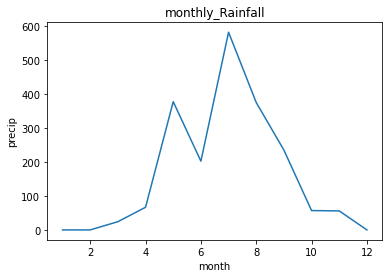

In [17]:
Monthly_RR.plot()
plt.title('monthly_Rainfall')

Text(0.5, 1.0, 'monthly_climatology')

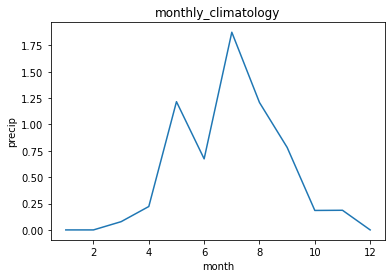

In [18]:
Longterm_Climatology_RR.plot()
plt.title('monthly_climatology')

# question 2


In [19]:
# computing Annual Totals
Annual_Totals_RR = coords_Yemen.resample(datetime='1Y').sum('datetime')
Annual_Totals_RR.to_series().reset_index()

,datetime,precip
0,2013-12-31,144.380005
1,2014-12-31,78.570000
2,2015-12-31,121.229996
3,2016-12-31,197.570007
4,2017-12-31,188.600006
5,2018-12-31,132.339996
6,2019-12-31,163.539993
7,2020-12-31,456.660034
8,2021-12-31,284.479980
9,2022-12-31,205.130005


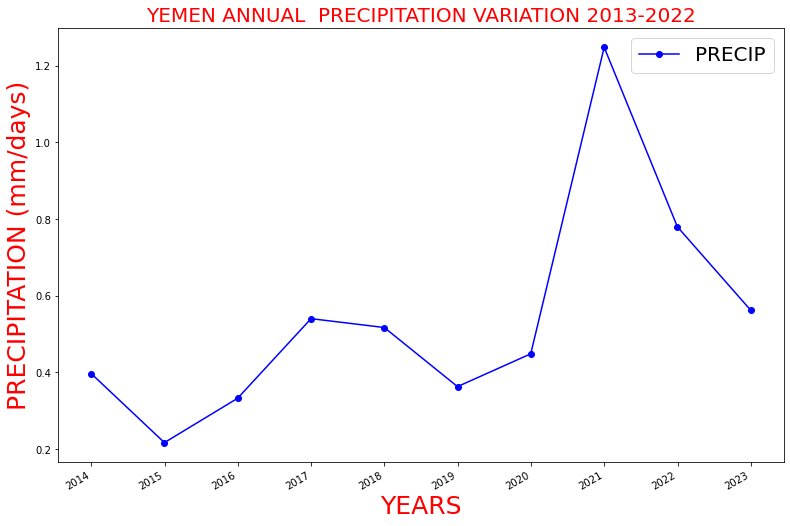

In [35]:
# Annual Average
Annual_Totals_RR= coords_Yemen.resample(datetime='1Y').mean('datetime')
Annual_Totals_RR.plot(color = 'b',marker='o', label='PRECIP')

barwidth = 0.3
plt.rcParams['figure.figsize']=[10,8]

# locating the legend
plt.legend(loc='upper right', fontsize=20)

# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=25, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')

plt.title('YEMEN ANNUAL  PRECIPITATION VARIATION 2013-2022', fontsize=20, color='r')
    
plt.show()

In [55]:

Annual_Average_RR= coords_Yeman.groupby('datetime.year').sum('datetime')
Annual_Average_RR.to_series().reset_index()

,year,precip
0,2013,144.380005
1,2014,78.570000
2,2015,121.229996
3,2016,197.570007
4,2017,188.600006
5,2018,132.339996
6,2019,163.539993
7,2020,456.660034
8,2021,284.479980
9,2022,205.130005


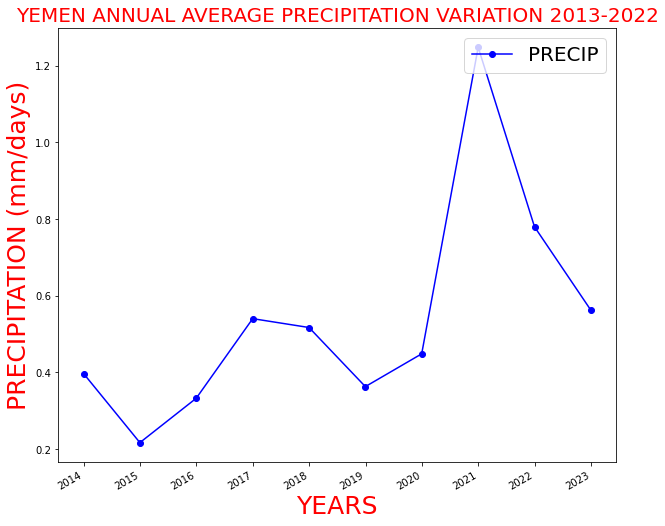

In [36]:
# Annual Average
Annual_Average_RR= coords_Yeman.resample(datetime='1Y').mean('datetime')
Annual_Average_RR.plot(color = 'b',marker='o', label='PRECIP')

barwidth = 0.3
plt.rcParams['figure.figsize']=[13,8]

# locating the legend
plt.legend(loc='upper right', fontsize=20)

# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=25, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')

plt.title('YEMEN ANNUAL AVERAGE PRECIPITATION VARIATION 2013-2022', fontsize=20, color='r')
    
#plt.savefig('Annual_average_timeseries.png')
plt.show()

# QUESTION 3

In [57]:
Monthly_RR2 = coords_Yeman.groupby('datetime.month').sum()
Monthly_RR2

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 48.0
    lat      float32 15.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [37]:
#computing the number of dry PER MONTH
#selecting precipitation <1mm
dry_CRR= da_Yeman.where(da_Yeman <1).sel(lon=48, lat=15, datetime=slice('2013','2022'))
dry_CRR=dry_CRR.where(dry_CRR !=-99)

dry_cmon=dry_CRR.groupby('datetime.month').mean('datetime')
dry_cmon.to_series().reset_index()

,month,precip
0,1,0.000000
1,2,0.000000
2,3,0.001424
3,4,0.015069
4,5,0.020325
5,6,0.024789
6,7,0.041481
7,8,0.050490
8,9,0.040114
9,10,0.005814


In [38]:
# SPATIAL PLOTS FOR THE NUMBER OF DRY (RR<1mm)----------------MONTHLY--------
#computing the number of dry PER MONTH
#selecting precipitation <1mm
dry_RR= da_Yeman.where(da_Yeman <1)
dry_RR=dry_RR.where(dry_RR !=-99)

dry_mon=dry_RR.groupby('datetime.month').mean('datetime')
dry_mon.to_series().reset_index()

# cartopy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy import feature as cf

In [39]:
# COMPUTING THE NUMBER FOR WET (RR>1mm) PER MONTH----------------MONTHLY----------
#selecting precipitation >1mm
wet_CRR= da_Yeman.where(da_Yeman >=1).sel(lon=48, lat=15, datetime=slice('2013','2022'))
wet_CRR=wet_CRR.where(wet_CRR !=-99)
wet_CRR
wet_cmon=wet_CRR.groupby('datetime.month').mean('datetime')
wet_cmon.to_series().reset_index()

,month,precip
0,1,NaN
1,2,NaN
2,3,3.392857
3,4,5.186666
4,5,11.250302
5,6,12.190625
6,7,8.520448
7,8,5.570461
8,9,6.055946
9,10,7.872857


In [40]:
# selecting coordintes
coordinates_Yeman=ds_Yeman.sel(lon=48, lat=15, datetime=slice('2013','2022'))

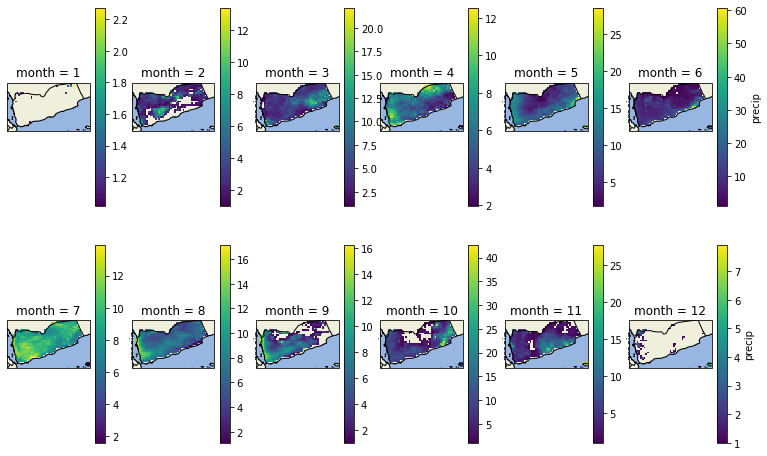

In [41]:
# SPATIAL PLOTS FOR THE NUMBER OF WET (RR>=1mm)----------------MONTHLY--------

#selecting precipitation >1mm
wet_RR= da_Yeman.where(da_Yeman >=1)
wet_RR=wet_RR.where(wet_RR !=-99)
wet_RR
wet_mon=wet_RR.groupby('datetime.month').mean('datetime')
wet_mon.to_series().reset_index()
fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#wet_mon.plot.contourf(x='lon',y='lat', col='month',col_wrap=6);
count=0
for Months in wet_mon.month:
    count+=1
    ax=fig.add_subplot(2,6,count,projection=ccrs.PlateCarree())
    wet_mon[wet_mon.month==Months].plot()
    
    #ADDING FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([42,54,12,19])

In [42]:
#-----------COMPUTING THE NUMBER OF DRY (RR<1mm) PER ANNUAL-------------ANNUAL--------
#selecting precipitation <1mm
Annual_dry_RR= da_Yeman.where(da_Yeman <1).sel(lon=48, lat=15, datetime=slice('2013','2022'))
Annual_dry_RR
Annual_cdry=Annual_dry_RR.groupby('datetime.year').mean('datetime')
Annual_cdry.to_series().reset_index()

,year,precip
0,2013,0.020723
1,2014,0.020407
2,2015,0.010000
3,2016,0.015884
4,2017,0.004940
5,2018,0.014598
6,2019,0.019300
7,2020,0.018687
8,2021,0.016261
9,2022,0.015325


In [43]:
#selecting precipitation >1mm
Annual_wet_RR= da_Yeman.where(da_Yeman >=1).sel(lon=48, lat=15, datetime=slice('2013','2022'))
Annual_wet_RR
# GROUPING data in years
Annual_cwet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Annual_cwet.to_series().reset_index()

,year,precip
0,2013,4.296875
1,2014,3.765789
2,2015,8.408571
3,2016,9.147142
4,2017,6.446207
5,2018,7.485882
6,2019,7.132727
7,2020,14.529032
8,2021,7.753611
9,2022,7.405555


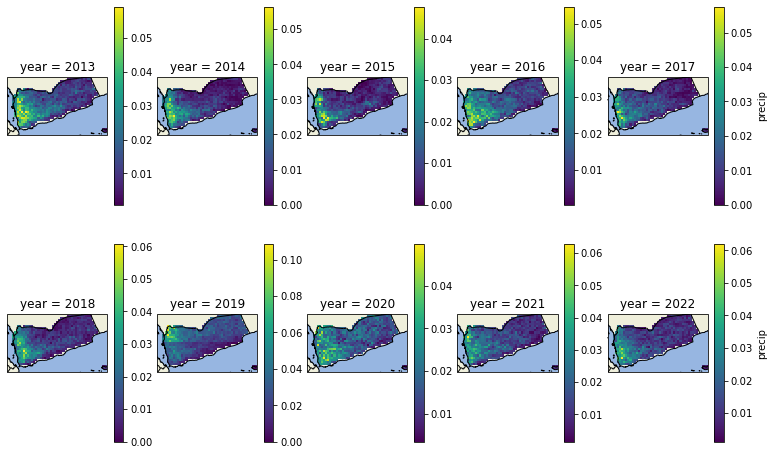

In [44]:
# SPATIAL PLOTS FOR THE NUMBER OF DRY (RR<1mm)----------------ANNUAL--------
#selecting precipitation <1mm
Annual_dry_RR= da_Yeman.where(da_Yeman <1)
Annual_dry_RR
Annual_dry=Annual_dry_RR.groupby('datetime.year').mean('datetime')
Annual_dry



fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
count=0
for Years in Annual_dry.year:
    count+=1
    ax=fig.add_subplot(2,5,count,projection=ccrs.PlateCarree())
    Annual_dry[Annual_dry.year==Years].plot()
    #ADDING FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([42,54,12,19])

plt.show()

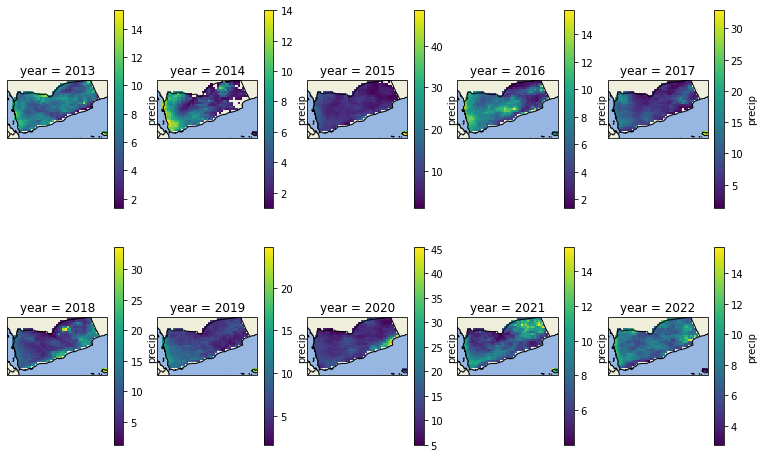

In [45]:
Annual_wet_RR= da_Yeman.where(da_Yeman >=1)
Annual_wet_RR
# GROUPING data in years
Annual_wet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Annual_wet

fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

count=0
for Years in Annual_wet.year:
    count+=1
    ax=fig.add_subplot(2,5,count,projection=ccrs.PlateCarree())
    Annual_wet[Annual_wet.year==Years].plot()
    #ADDING FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([42,54,12,19])

plt.show()

In [46]:
# selecting coordintes
coordinates_Yeman=ds_Yeman.sel(lon=48, lat=15, datetime=slice('2013','2022'))

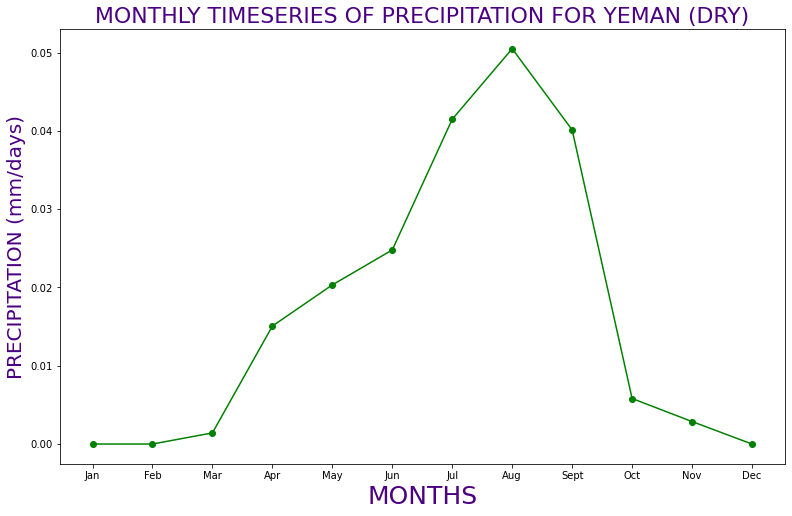

In [79]:
#computing the number of dry PER MONTH TIMESERIES
#selecting precipitation <1mm
dry_RR= dry_cmon.where(dry_cmon <1)
dry_RR=dry_RR.where(dry_RR !=-99)
Months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

plt.plot(Months,dry_RR,color = 'g',marker='o', label='PRECIP')
plt.title('MONTHLY TIMESERIES OF PRECIPITATION FOR YEMAN (DRY)', fontsize='22', color='indigo')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='indigo')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=25, color='indigo')
plt.savefig('MONTHLY (TIMESERIES(DRY MONTH).png')
plt.show()

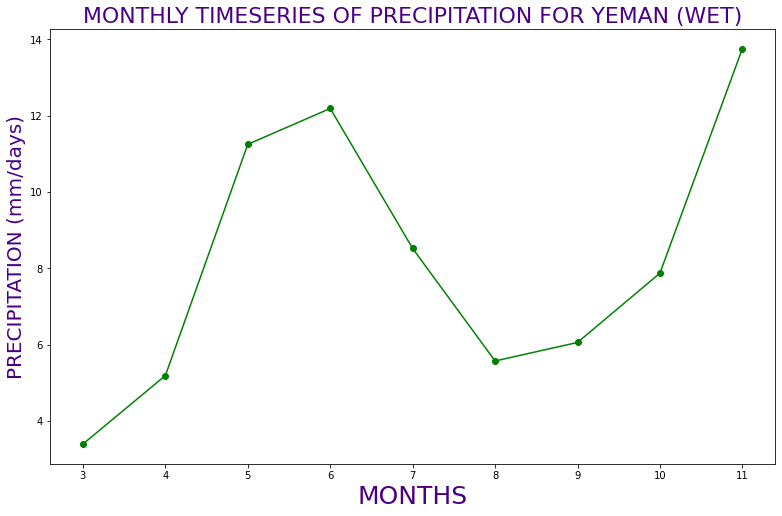

In [80]:
# TIMESERIES PLOT FOR WET (RR>1mm) PER MONTH----------------MONTHLY----------
#selecting precipitation >1mm
wet_CRR= da_Yeman.where(da_Yeman >=1).sel(lon=48, lat=15, datetime=slice('2013','2022'))
wet_CRR=wet_CRR.where(wet_CRR !=-99)
wet_CRR
wet_cmon=wet_CRR.groupby('datetime.month').mean('datetime')
wet_cmon.plot(color = 'g',marker='o', label='PRECIP')

plt.title('MONTHLY TIMESERIES OF PRECIPITATION FOR YEMAN (WET)', fontsize='22', color='indigo')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='indigo')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=25, color='indigo')

plt.show()

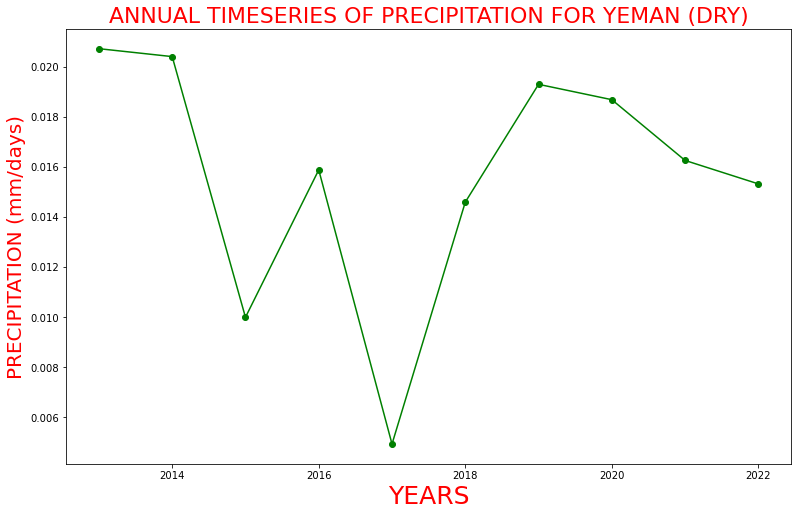

In [81]:
# COMPUTING THE NUMBER OF DRY (RR<1mm)-----MONTHLY TIMESERIES----
#selecting precipitation <1mm
Annual_cdry.plot(color = 'g',marker='o', label='PRECIP');
plt.title('ANNUAL TIMESERIES OF PRECIPITATION FOR YEMAN (DRY)', fontsize='22', color='r')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')
plt.savefig('ANNUAL (TIMESERIES(DRY).png')
plt.show()

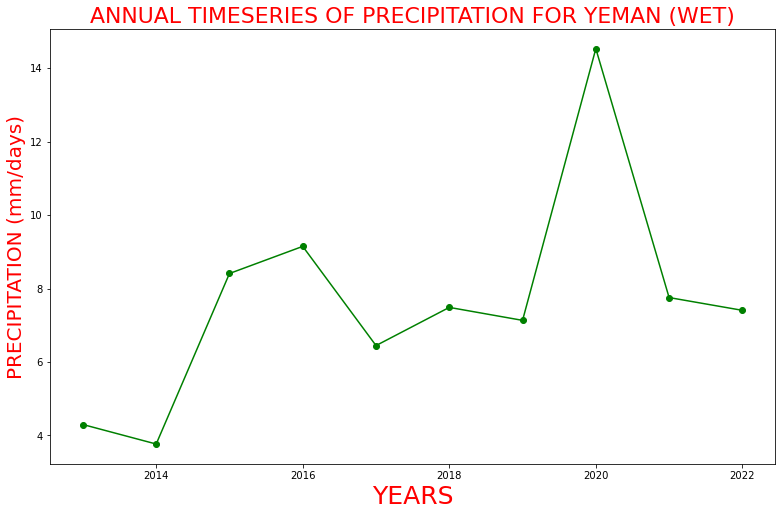

In [82]:
# COMPUTING THE NUMBER OF DRY (RR>=1mm) MONTHLY
#selecting precipitation >1mm

Annual_cwet.plot(color = 'g',marker='o', label='PRECIP')
plt.title('ANNUAL TIMESERIES OF PRECIPITATION FOR YEMAN (WET)', fontsize='22', color='r')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='r')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='r')
#plt.savefig('ANNUAL (TIMESERIES(WET).png')
plt.show()

# QUESTION

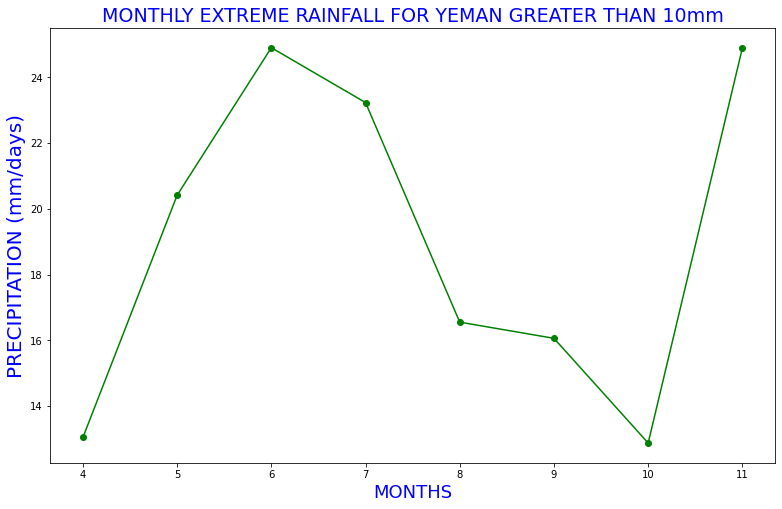

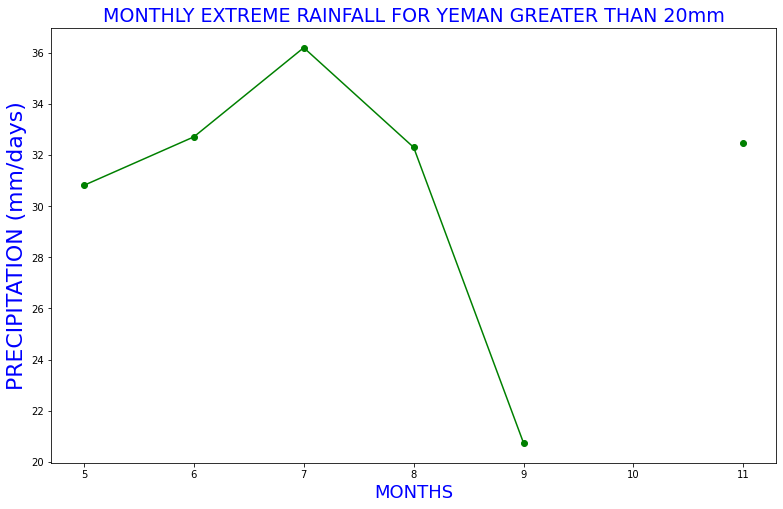

In [86]:
# COMPUTING THE NUMBER OF DRY (RR>10mm)-----MONTHLY TIMESERIES----
#selecting precipitation >10mm
dry_RR= coordinates_Yeman.where(coordinates_Yeman['precip'] >10).precip
dry_RR
dry_RR.sel()
dry1=dry_RR.groupby('datetime.month').mean('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
dry1
plt.title('MONTHLY EXTREME RAINFALL FOR YEMAN GREATER THAN 10mm', fontsize='19', color='b')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='b')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=18, color='b')

plt.show()

#selecting precipitation >20mm
dry_RR= coordinates_Yeman.where(coordinates_Yeman['precip'] >20).precip
dry_RR
dry_RR.sel()
dry2=dry_RR.groupby('datetime.month').mean('datetime')
dry2
dry2.plot(color = 'g',marker='o', label='PRECIP');
plt.title('MONTHLY EXTREME RAINFALL FOR YEMAN GREATER THAN 20mm', fontsize='19', color='b')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=22, color='b')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=18, color='b')
plt.savefig('MONTHLY EXTREME RR(20).png')
plt.show()

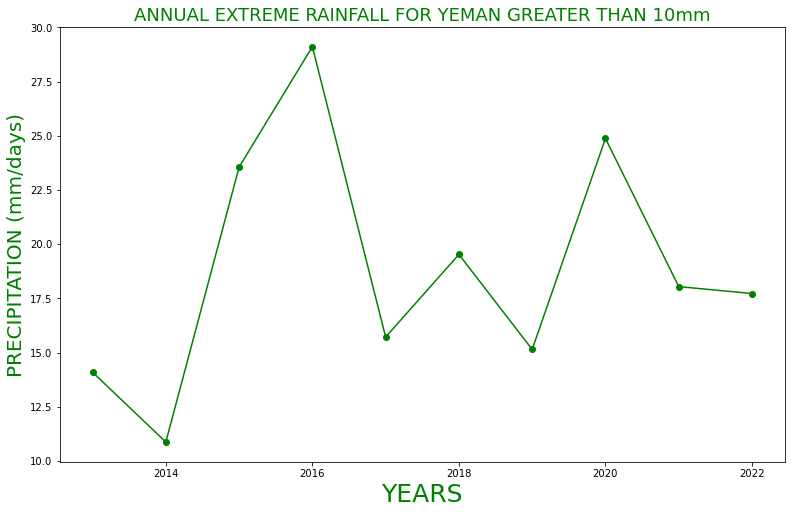

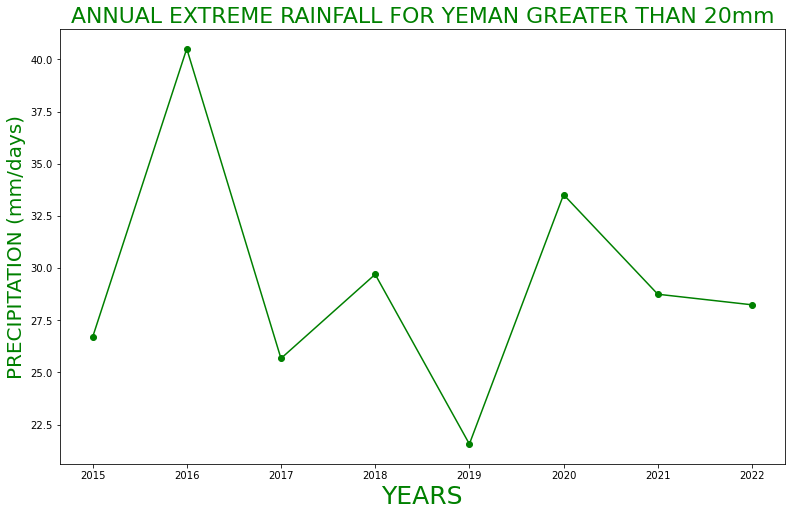

In [87]:
# COMPUTING THE NUMBER OF DRY (RR>10mm)-----ANNUAL TIMESERIES----
#selecting precipitation >10mm
dry_RR= coordinates_Yeman.where(coordinates_Yeman['precip'] >10).precip
dry_RR
dry_RR.sel()
dry1=dry_RR.groupby('datetime.year').mean('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
plt.title('ANNUAL EXTREME RAINFALL FOR YEMAN GREATER THAN 10mm', fontsize='18', color='g')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='g')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='g')
plt.savefig('ANNUAL (TIMESERIES(DRY).png')
plt.show()

#selecting precipitation >20mm
dry_RR= coordinates_Yeman.where(coordinates_Yeman['precip'] >20).precip
dry_RR
dry1=dry_RR.groupby('datetime.year').mean('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
plt.title('ANNUAL EXTREME RAINFALL FOR YEMAN GREATER THAN 20mm', fontsize='22', color='g')
# naming the Y-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='g')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='g')
#plt.savefig('ANNUAL (TIMESERIES(WET).png')
plt.show()

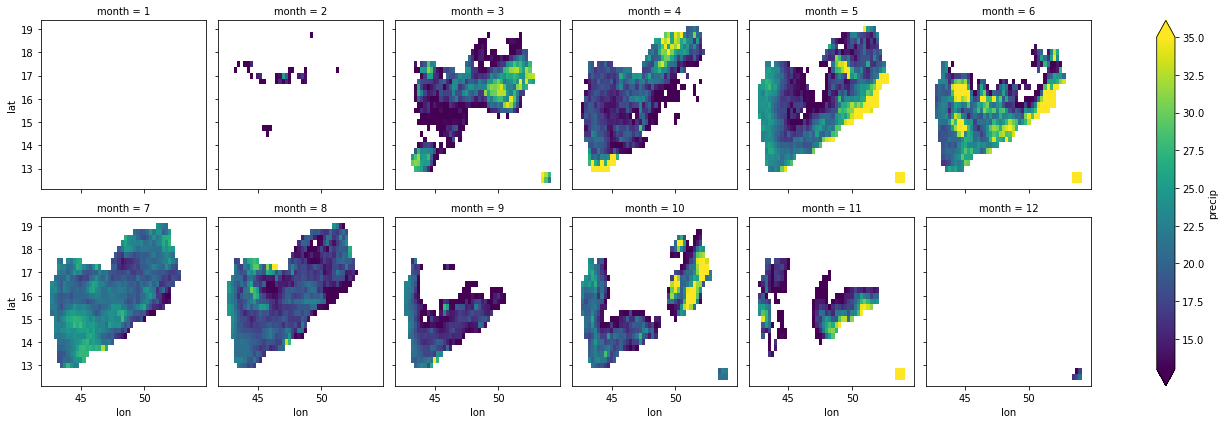

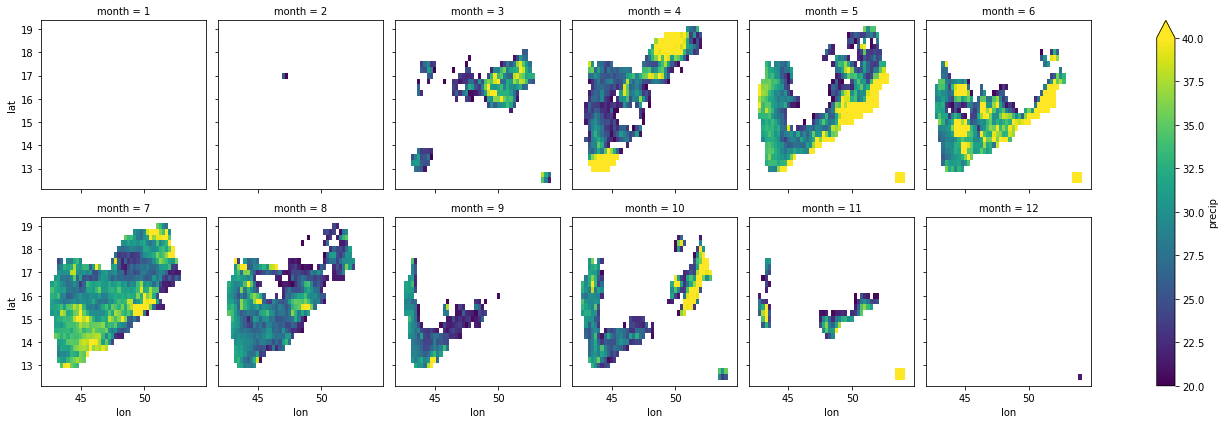

In [88]:
#selecting precipitation >10mm
dry_RR= ds_Yeman.where(ds_Yeman['precip'] >10).precip
dry_RR

dry1=dry_RR.groupby('datetime.month').mean('datetime')[:,:,:]
dry1.plot(vmax=35, vmin=13, col_wrap=6, col='month');

plt.show()

#selecting precipitation >10mm
dry_RR= ds_Yeman.where(ds_Yeman['precip'] >20).precip
dry_RR

dry1=dry_RR.groupby('datetime.month').mean('datetime')[:,:,:]
dry1.plot(vmax=40, vmin=20, col_wrap=6, col='month');

plt.show()

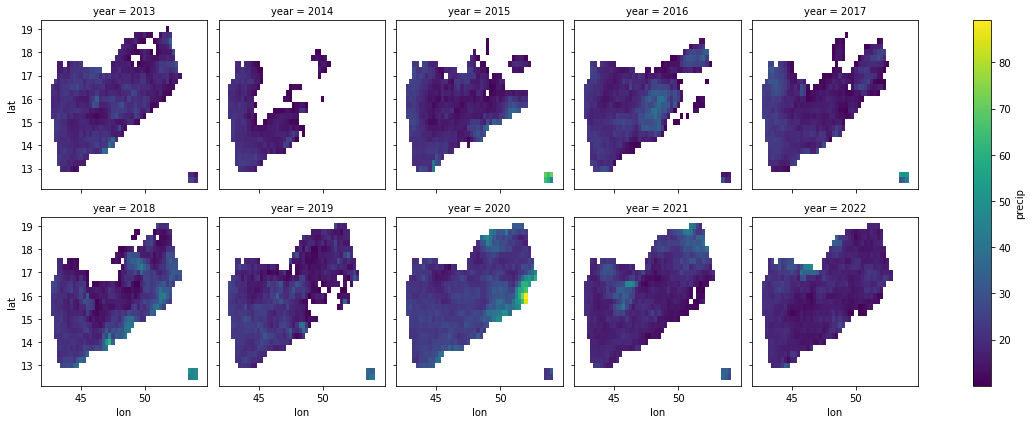

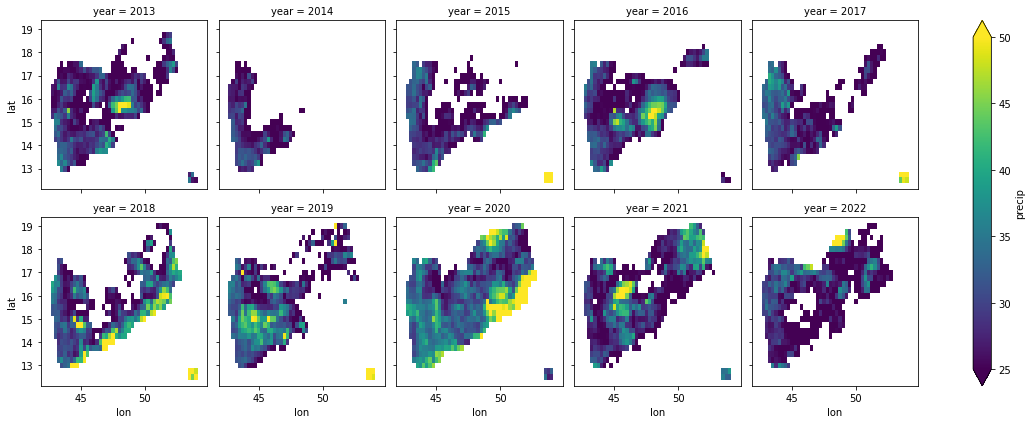

In [90]:
#selecting precipitation >10mm
Annual_dry_RR= ds_Yeman.where(ds_Yeman['precip'] >10).precip
Annual_dry_RR
Annual_dry=Annual_dry_RR.groupby('datetime.year').mean('datetime')[:,:,:]
Annual_dry.plot(col_wrap=5, col='year')
#plt.savefig('R>10 Spatial ANNUAL.png')
plt.show()

#selecting precipitation >20mm
Annual_wet_RR= da_Yeman.where(da_Yeman >=20)
Annual_wet_RR
# GROUPING data in years
Annual_wet=Annual_wet_RR.groupby('datetime.year').mean('datetime')[:,:,:]
Annual_wet.plot(vmax=50, vmin=25, col_wrap=5, col='year')
#plt.savefig('R>20 Spatial ANNUAL.png')
plt.show()